**구글드라이브 imoprt**





**필요한 모듈 import**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

import os
import cv2
import numpy as np
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.utils import shuffle  
import seaborn as sns
import cv2
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os

In [ ]:
import os
import tensorflow as tf
import numpy as np
import random

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

seed_everything(42)





**오류 발생하면 주석 지우고 실치 후 진행**






In [ ]:
#!apt-get install -y libsm6 libxext6 libxrender-dev
#!pip install opencv-python

In [ ]:
#!pip install tensorflow==2.6.0
#!pip install keras~=2.6.0

In [ ]:
#!pip install -U efficientnet

**dict 형태로 클래스 라벨링**

In [ ]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
mapclass = {0 : 'bag', 1 : 'bed', 2 : 'chair', 3 : 'coffeetable', 4 : 'cup' , 5 : 'kitchentools', 6 : 'lamp', 7 : 'laptop', 8 : 'LivingSofa', 9 : 'pot', 10 : 'shoe'}

**이미지 경로 불러오기**

**아직 이미지로 처리한건 아니고 경로만 가져옴**

In [ ]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/colab/termproject/Term_Dataset/train")
train_path.glob(r'**/*.png')

valid_path = Path("/content/drive/MyDrive/colab/termproject/Term_Dataset/val")
valid_path.glob(r'**/*.png')



<generator object Path.glob at 0x7f05274730d0>

**불러온 이미지 경로를 리스트 형태로 저장**

In [ ]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))

print(train_filepath)

[PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png'), PosixPath('/content/drive/MyDrive/colab/te

**제대로 됐나 확인**

In [ ]:
for i in train_filepath:  
  num = str(i.stem)
  print(i)
  print(num)
  print(int(num[3:8]))

/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png
img00071
71
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png
img00024
24
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png
img00013
13
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png
img00066
66
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png
img00068
68
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png
img00033
33
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png
img00087
87
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png
img00122
122
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png
img00042
42
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png
img00051
51
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png
img00054
54
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img0

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/train_data.csv')
for i in csv_file['file_name']:
  print(int(i[3:8]))

47
53
52
46
50
44
45
51
55
41
69
68
40
54
42
56
57
43
18
24
30
31
25
19
33
27
26
32
36
22
23
37
21
35
9
8
34
20
39
5
11
10
4
38
12
6
7
13
17
3
2
16
0
14
28
29
15
1
66
67
59
71
65
64
70
58
60
48
49
61
63
62
84
90
133
127
126
132
91
85
93
87
78
118
124
130
131
125
119
79
86
92
96
82
121
135
109
108
134
120
83
97
81
95
136
122
123
137
94
80
142
143
141
140
99
72
112
106
107
113
73
98
139
105
111
110
104
138
74
100
114
128
129
115
101
75
88
77
117
103
102
116
76
89
193
187
178
150
144
145
151
179
186
192
184
190
147
153
152
146
191
185
208
181
195
156
157
194
180
209
196
182
155
169
168
154
183
197
207
213
159
171
165
164
170
158
212
206
210
204
199
166
172
173
167
198
205
211
215
201
188
163
177
176
162
189
200
214
202
174
160
148
149
161
175
203
286
279
245
251
250
244
278
287
285
252
246
247
253
284
280
257
243
242
256
281
283
240
254
268
269
255
241
282
226
232
233
227
219
231
225
224
230
218
234
220
221
235
223
237
236
222
238
239
229
228
216
217
258
264
270
271
265
259
273
267
266
27

In [ ]:
os.path.split(os.path.split(train_filepath[0])[1]) 
    
    

('', 'img00071.png')

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

**리스트에 있는 이미지 경로 순서대로 라벨링**

In [ ]:
classes_train = []
classes_valid = []


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/train_data.csv')

for i in train_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_train.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [ ]:
print(len(classes_train))

864


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/val_data.csv')

for i in valid_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_valid.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [ ]:
print(len(classes_valid))

133


In [ ]:
print(len(classes_train))
print(len(classes_valid))

864
133


In [ ]:
print(classes_valid)

[6, 2, 9, 5, 6, 6, 0, 8, 2, 10, 4, 3, 5, 7, 7, 9, 0, 6, 5, 6, 2, 10, 5, 6, 8, 1, 9, 1, 9, 5, 7, 8, 8, 0, 4, 3, 8, 9, 6, 9, 3, 9, 2, 0, 0, 3, 6, 10, 10, 8, 8, 7, 10, 3, 9, 7, 6, 1, 1, 10, 3, 2, 3, 5, 9, 1, 4, 4, 1, 1, 3, 5, 10, 6, 4, 2, 4, 2, 5, 0, 9, 0, 5, 6, 10, 8, 5, 4, 9, 3, 6, 7, 10, 1, 1, 6, 3, 4, 5, 8, 6, 0, 6, 1, 6, 4, 6, 2, 6, 10, 3, 10, 8, 1, 2, 9, 10, 2, 10, 0, 7, 9, 6, 7, 0, 7, 4, 2, 0, 4, 9, 8, 10]


**이미지 경로를 통해 이미지 저장**

In [ ]:
train_images = []
print(len(train_images))

0


In [ ]:
valid_images = []
print(len(valid_images))

0


In [ ]:
for i in train_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00069.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00091.png
/content/drive/MyDrive/colab/termproject/Term_Datas

In [ ]:
print(len(train_images))

864


In [ ]:
for i in valid_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  valid_images.append(tmp)

/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00069.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00027.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00109.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00057.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00084.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00075.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00002.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00098.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00032.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00124.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00045.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00043.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00059.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00085.png
/conte

In [ ]:
print(len(valid_images))

133


In [ ]:
valid_images = np.array(valid_images, dtype = 'float32') / 255

In [ ]:
train_images = np.array(train_images, dtype = 'float32') / 255

In [ ]:
classes_train = np.array(classes_train, dtype = 'int32')  

In [ ]:
classes_valid = np.array(classes_valid, dtype = 'int32')

In [ ]:
print(len(valid_images))
print(len(train_images))

133
864




****라벨링된 결과 시각화해서 확인하기****

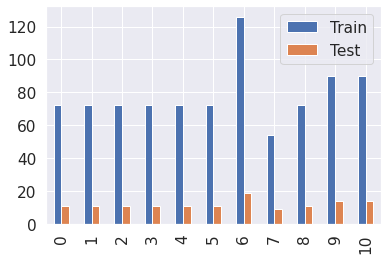

In [ ]:
df=pd.concat([pd.DataFrame(np.unique(classes_train,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(classes_valid,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
              
df.plot(kind='bar');

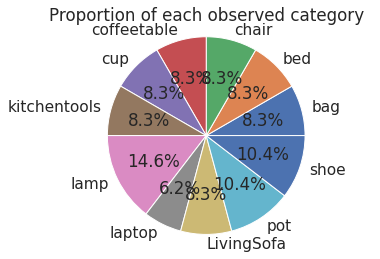

In [ ]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

**이미지가 잘 저장됐는지 확인**

In [ ]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(classes_train[index]).map(mapclass))[0]
    else:
        img=valid_images[index]
        lbl=list(pd.Series(classes_valid[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

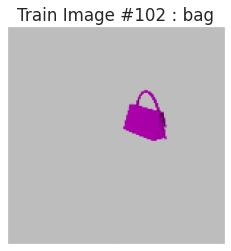

In [ ]:
displayimagebyindex(np.random.randint(0,800),dset='Train')

**모델 구축 시작**


**train_images에는 이미지가, classes_train에는 이미지의 클래스가 저장됨**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**학습 시작**

In [ ]:
history = model.fit(train_images, classes_train, batch_size=128, epochs=20, validation_split = 0.2)
#history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
6/6 [==============================] - 18s 3s/step - loss: 2.3759 - accuracy: 0.1722 - val_loss: 2.1440 - val_accuracy: 0.2081
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 1.9424 - accuracy: 0.3632 - val_loss: 1.7980 - val_accuracy: 0.3295
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 1.5645 - accuracy: 0.4891 - val_loss: 1.2448 - val_accuracy: 0.5780
Epoch 4/20
6/6 [==============================] - 16s 3s/step - loss: 1.1407 - accuracy: 0.7033 - val_loss: 0.9751 - val_accuracy: 0.6879
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: 0.8391 - accuracy: 0.7656 - val_loss: 0.7817 - val_accuracy: 0.7514
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: 0.6412 - accuracy: 0.7945 - val_loss: 0.5906 - val_accuracy: 0.7861
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 0.5085 - accuracy: 0.8365 - val_loss: 0.4839 - val_accuracy: 0.8439
Epoch 8/20
6/6 [==================

In [ ]:
print(classes_valid)

[ 6  2  9  5  6  6  0  8  2 10  4  3  5  7  7  9  0  6  5  6  2 10  5  6
  8  1  9  1  9  5  7  8  8  0  4  3  8  9  6  9  3  9  2  0  0  3  6 10
 10  8  8  7 10  3  9  7  6  1  1 10  3  2  3  5  9  1  4  4  1  1  3  5
 10  6  4  2  4  2  5  0  9  0  5  6 10  8  5  4  9  3  6  7 10  1  1  6
  3  4  5  8  6  0  6  1  6  4  6  2  6 10  3 10  8  1  2  9 10  2 10  0
  7  9  6  7  0  7  4  2  0  4  9  8 10]


In [ ]:
print(len(valid_images))
print(len(classes_valid))

133
133


**평가 시작**

In [ ]:
val_loss = model.evaluate(valid_images, classes_valid)

5/5 [==============================] - 1s 157ms/step - loss: 0.0686 - accuracy: 0.9850


In [ ]:
predictions = model.predict(valid_images)
pred_labels = np.argmax(predictions, axis = 1)

In [ ]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

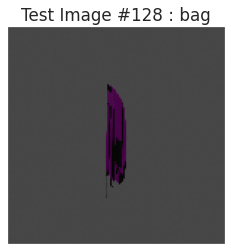

Predicted Class : 
      bag


In [ ]:
checkpredictions(np.random.randint(100,133))
#checkpredictions(122)

In [ ]:
print(classification_report(classes_valid, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        11
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        19
           7       1.00      0.89      0.94         9
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        14

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.99      0.98      0.98       133



**오류 확인**

In [ ]:
# def display_examples(class_names, images, labels):
#     """
#         Display 25 images from the images array with its corresponding labels
#     """
    
#     fig = plt.figure(figsize=(10,10))
#     fig.suptitle("Some examples of mislabeled images by the classifier", fontsize=16)
#     for i in range(25):
#         plt.subplot(5,5,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(images[i], cmap=plt.cm.binary)
#         plt.xlabel(class_names[labels[i]])
#     plt.show()

In [ ]:
# def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
#     """
#         Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
#     """
#     BOO = (test_labels == pred_labels)
#     mislabeled_indices = np.where(BOO == 0)
#     mislabeled_images = test_images[mislabeled_indices]
#     mislabeled_labels = pred_labels[mislabeled_indices]

#     title = "Some examples of mislabeled images by the classifier:"
#     display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
# print_mislabeled_images(class_names, valid_images, classes_valid, pred_labels)

In [ ]:
# CM = confusion_matrix(classes_valid, pred_labels)
# ax = plt.axes()
# sn.heatmap(CM, annot=True, 
#            annot_kws={"size": 10}, 
#            xticklabels=class_names, 
#            yticklabels=class_names, ax = ax)
# ax.set_title('Confusion matrix')
# plt.show()

**다른건 그렇다 쳐도 신발을 아예 인식하지 못하고 있음**

**다른 모델을 사용해 학습시켜보자.**

In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input

# model = VGG16(weights='imagenet', include_top=False)

In [ ]:
# train_features = model.predict(train_images)
# valid_features = model.predict(valid_images)

In [ ]:
# n_train, x, y, z = train_features.shape
# n_test, x, y, z = valid_features.shape
# numFeatures = x * y * z

In [ ]:
# from sklearn import decomposition

# pca = decomposition.PCA(n_components = 2)

# X = train_features.reshape((n_train, x*y*z))
# pca.fit(X)

# C = pca.transform(X) # Représentation des individus dans les nouveaux axe
# C1 = C[:,0]
# C2 = C[:,1]

In [ ]:
# plt.subplots(figsize=(10,10))

# for i, class_name in enumerate(class_names):
#     plt.scatter(C1[classes_train == i][:1000], C2[classes_train == i][:1000], label = class_name, alpha=0.4)
# plt.legend()
# plt.title("PCA Projection")
# plt.show()

In [ ]:
# model2 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape = (x, y, z)),
#     tf.keras.layers.Dense(50, activation=tf.nn.relu),
#     tf.keras.layers.Dense(11, activation=tf.nn.softmax)
# ])

# model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# history2 = model2.fit(train_features, classes_train, batch_size=128, epochs=15, validation_split = 0.2)

In [ ]:
# valid_loss = model2.evaluate(valid_features, classes_valid)

In [ ]:
class_list = []
csv_emp_data = pd.read_csv("/content/drive/MyDrive/colab/termproject/Term_Dataset/val_data_emp.csv")
idx = 0
name_list = []
for i in csv_emp_data["file_name"]:
  name_list.append(i);
  idx = 0;
  for j in valid_filepath:
    if (str(i) == str(j.stem) + '.png'):
      class_list.append(mapclass[pred_labels[valid_filepath.index(j)]]);
      idx+=1
      break;

In [ ]:
# name_list = []

# for i in valid_filepath:
#   tmp = str(i.stem) + '.png'
#   name_list.append(tmp)

In [ ]:
# class_list = []

# for i in pred_labels:
#   tmp = mapclass[i]
#   class_list.append(tmp)

In [ ]:
print(len(class_list))
print(len(name_list))
dataframe = pd.DataFrame({'file_name' : name_list, 'class' : class_list})

print(dataframe)

133
133
        file_name class
0    img00009.png   bag
1    img00008.png   bag
2    img00005.png   bag
3    img00010.png   bag
4    img00004.png   bag
..            ...   ...
128  img00120.png  shoe
129  img00122.png  shoe
130  img00123.png  shoe
131  img00128.png  shoe
132  img00129.png  shoe

[133 rows x 2 columns]


In [ ]:
dataframe.to_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/result6.csv', index = True, encoding = 'cp949')

모델 저장

In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/colab/termproject/knn_model.pkl')

INFO:tensorflow:Assets written to: ram://97b49208-8cdb-4497-adad-6a285b7c26b7/assets


['/content/drive/MyDrive/colab/termproject/knn_model.pkl']

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/colab/termproject/knn_model.pkl')
# test_csv_file = pd.read_csv()
# test_path = Path()
# test_filepath = list(test_path.glob(r'**/*.png'))

# test_predictions = loaded_model.predict()